# Problem 3 (Python Script)
Calculate a solution of the following lin-
ear program. Validate your answer by writing a Python script that solves for
the optimal (integer) solution.
max
x,y 5x + 3y

s.t. x + 2y ≤ 14

3x − y ≥ 0

x − y ≤ 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

In [4]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 84.2 MB/s eta 0:00:00


In [5]:
import pulp

In [6]:
# Create the Linear Programming Problem
lp_problem3 = pulp.LpProblem("Maximize_Problem", pulp.LpMaximize)

# Define our decision variables
x = pulp.LpVariable('x', lowBound=0, cat='Continuous')
y = pulp.LpVariable('y', lowBound=0, cat='Continuous')

# Objective Function we aim to maximize
lp_problem3 += 5*x + 3*y

# The following are our constraints
lp_problem3 += x + 2*y <= 14
lp_problem3 += 3*x - y >= 0
lp_problem3 += x - y >= 2

# Solve our problem
lp_problem3.solve()

# Now we retrieve our optimal solution
optimal_x = pulp.value(x)
optimal_y = pulp.value(y)
optimal_obj = pulp.value(lp_problem3.objective)

print("Optimal Solution: ")
print(f"x = {optimal_x} ")
print(f"y = {optimal_y} ")
print(f"Maximum value (objective function) = {optimal_obj} ")

Optimal Solution: 
x = 14.0 
y = 0.0 
Maximum value (objective function) = 70.0 


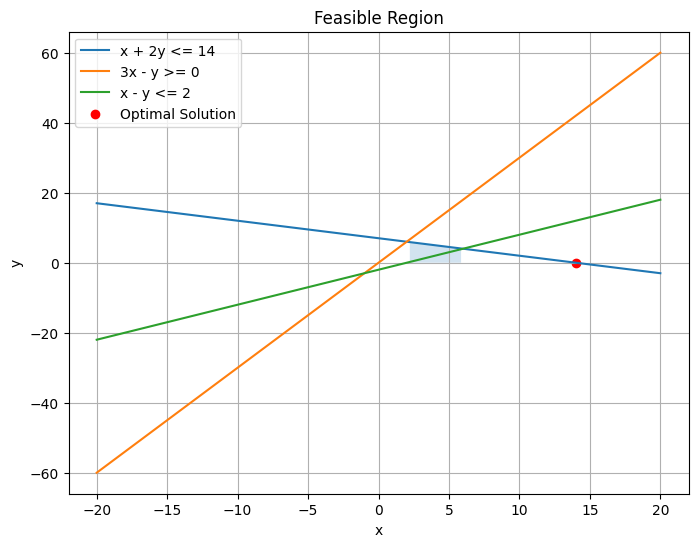

In [8]:
# Plotting the feasible region
x_vals = np.linspace(-20, 20, 100)  # Adjust the range based on constraints for x
y1 = (14 - x_vals) / 2
y2 = 3 * x_vals
y3 = x_vals - 2

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y1, label='x + 2y <= 14')
plt.plot(x_vals, y2, label='3x - y >= 0')
plt.plot(x_vals, y3, label='x - y <= 2')

plt.fill_between(x_vals, 0, y1, where=(y2 >= y1) & (y3 <= y1), alpha=0.2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Region')
plt.legend()
plt.grid(True)
plt.scatter(optimal_x, optimal_y, color='red', label='Optimal Solution')
plt.legend()
plt.show()


Optimal Solution within the feasible region:
x = 6.0
y = 4.0
Maximum value (objective function) = 42.0


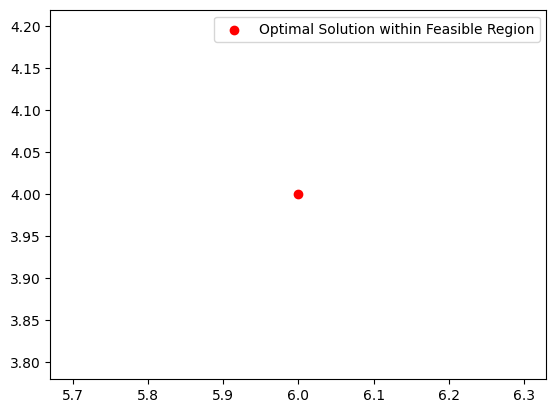

In [9]:
# Find optimal solution within the feasible region
lp_problem_restricted = pulp.LpProblem("Maximize_Problem", pulp.LpMaximize)
lp_problem_restricted += 5 * x + 3 * y
lp_problem_restricted += x + 2 * y <= 14
lp_problem_restricted += 3 * x - y >= 0
lp_problem_restricted += x - y <= 2
lp_problem_restricted.solve()

optimal_x_restricted = pulp.value(x)
optimal_y_restricted = pulp.value(y)
optimal_obj_restricted = pulp.value(lp_problem_restricted.objective)

print("\nOptimal Solution within the feasible region:")
print(f"x = {optimal_x_restricted}")
print(f"y = {optimal_y_restricted}")
print(f"Maximum value (objective function) = {optimal_obj_restricted}")

plt.scatter(optimal_x_restricted, optimal_y_restricted, color='red', label='Optimal Solution within Feasible Region')
plt.legend()
plt.show()